# Practical: Crystal Structure
```{admonition} Pymatgen
:class: info
Make sure you have `pymatgen` installed. Please refer to the [installation instructions](../orientation/setup.md#creating-python-virtual-environments).
```

`pymatgen` ([Python Materials Genome](https://pymatgen.org/)) is a Python library for materials analysis. It provides classes to work with crystal structures, molecules, and other materials-related objects. It also provides tools to perform various analyses on these objects.

In this practical, we will learn how to use the `pymatgen` library to work with crystal structures. We will learn how to create a crystal structure, visualize it, and perform some basic operations on it. 



In short words, crystal structure = lattice + basis. We will start from the lattice.

## Lattice

Crystal structure is a fundamental concept in materials science. It describes the arrangement of atoms in a solid material. The crystal structure of a material can be described by the lattice parameters and the atomic positions within the unit cell.

You can use `pymatgen` to create a `Lattice` object. The lattice is defined by three lattice vectors `a`, `b`, and `c`. You can supply lattice vectors as a tuple `(a, b, c)` using `from_parameters()` or as a $3\times3$ matrix using its `matrix` attribute.

$$
\begin{pmatrix}
a_x & a_y & a_z \\
b_x & b_y & b_z \\
c_x & c_y & c_z \\
\end{pmatrix}
$$

In [1]:
from pymatgen.core import Lattice

# Create a Lattice object
lattice = Lattice(matrix = [[5.43, 0, 0],  # ax, ay, az
                            [0, 5.43, 0],  # bx, by, bz
                            [0, 0, 5.43]]) # cx, cy, cz

# Another way to create this Lattice object
lattice = Lattice.from_parameters(a=5.43, b=5.43, c=5.43, alpha=90, beta=90, gamma=90)
lattice = Lattice.cubic(a=5.43)

print(lattice)


print(lattice.get_cartesian_coords([0.5, 0.5, 0.5]))



5.430000 0.000000 0.000000
0.000000 5.430000 0.000000
0.000000 0.000000 5.430000
[2.715 2.715 2.715]


### Calculating Miller Indices and d-spacing
Miller indices are used to describe planes in a crystal lattice. The Miller indices of a plane are the reciprocals of the fractional intercepts of the plane on the unit cell axes. The Miller indices of a plane are denoted as $(hkl)$. The Miller indices of a plane are calculated using `get_miller_index_from_coords()` method of the `Lattice` class. You can provide the coordinates of the plane as a tuple `(x, y, z)`. The method will return the Miller indices of the plane.

The d-spacing of a plane is the distance between the planes. The d-spacing of a plane is calculated using the `d_hkl()` method of the `Lattice` class. You can provide the Miller indices of the plane as a tuple `(h, k, l)`. The method will return the d-spacing of the plane.

For cubic systems, the d-spacing of a plane with Miller indices $(hkl)$ is given by the formula:
$d_{hkl} = \frac{a}{\sqrt{h^2 + k^2 + l^2}}$

In [2]:
lattice = Lattice.from_parameters(a=5.43, b=5.43, c=5.43, alpha=90, beta=90, gamma=90)
miller_indices=lattice.get_miller_index_from_coords([[0.5, 0, 0],
                                                    [0, 0.5, 0.0],
                                                    [0.0, 0, 1]])
print(f"Miller indices: {miller_indices}")

d_spacing = lattice.d_hkl(miller_indices)
print(f"d-spacing: {d_spacing:.3f} Å")

Miller indices: (2, 2, 1)
d-spacing: 1.810 Å


## Structure
You can create a `Structure` object by providing the lattice and the basis. Basis is the set of atomic positions within the unit cell.  Each atomic position is a tuple `(specie, coords)` where `species` is the atomic symbol and `coords` is the coordiantes (by default fractional) of the atom in the unit cell.

In [3]:
from pymatgen.core import Structure

lattice_si = Lattice.from_parameters(a=5.43, b=5.43, c=5.43, alpha=90, beta=90, gamma=90) 
structure_si = Structure.from_spacegroup(sg=227, species=["Si"], lattice=lattice_si, coords=[[0, 0, 0]])

print(structure_si)

Full Formula (Si8)
Reduced Formula: Si
abc   :   5.430000   5.430000   5.430000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (8)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0.5   0     0.5
  1  Si    0.25  0.25  0.25
  2  Si    0     0     0
  3  Si    0.25  0.75  0.75
  4  Si    0.75  0.25  0.75
  5  Si    0     0.5   0.5
  6  Si    0.5   0.5   0
  7  Si    0.75  0.75  0.25


## Apply Deformation
You can apply a deformation to the lattice using the `apply_strain()` method. The deformation is defined by a $3\times3$ matrix. This is useful to study the effect of strain on the crystal structure.

In [4]:
print(f"Lattice parameters: {structure_si.lattice.a:.3f}, {structure_si.lattice.b:.3f}, {structure_si.lattice.c:.3f}")
structure_si.apply_strain([-0.01, -0.01, -0.01], inplace=True) # Apply a 1% strain to the structure
print(f"Lattice parameters (after strained): {structure_si.lattice.a:.3f}, {structure_si.lattice.b:.3f}, {structure_si.lattice.c:.3f}")


Lattice parameters: 5.430, 5.430, 5.430
Lattice parameters (after strained): 5.376, 5.376, 5.376


## Structure Visualization
You can export the crystal structure to a `.cif` file and visualize it using visualization tools like VESTA, Jmol, or VESTA.

In this course, we will use VESTA to visualize the crystal structures. You can find more details about VESTA in the [next practical](./vesta.md).

In [5]:
structure_si.to(filename="Si.cif")

# You can also load a structure from a CIF file
structure_si = Structure.from_file("Si.cif")

## Primitive Cell vs Convensional Cell
The primitive cell is the smallest unit cell that can be used to describe the crystal structure. The conventional cell is a larger unit cell that is used to describe the crystal structure in a more convenient way. You can convert a structure to a primitive cell using `structure.get_primitive_structure()`.

In [6]:
primitive_structure = structure_si.get_primitive_structure()

print(f"conventional_structure = \n{structure_si}")
print(f"primitive_structure = \n{primitive_structure}\n")

conventional_structure = 
Full Formula (Si8)
Reduced Formula: Si
abc   :   5.375700   5.375700   5.375700
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (8)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0.5   0     0.5
  1  Si    0.25  0.25  0.25
  2  Si    0     0     0
  3  Si    0.25  0.75  0.75
  4  Si    0.75  0.25  0.75
  5  Si    0     0.5   0.5
  6  Si    0.5   0.5   0
  7  Si    0.75  0.75  0.25
primitive_structure = 
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.801194   3.801194   3.801194
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.75  0.75  0.75



## Symmetry
### Symmetry Analyzer
`pymatgen` provides a `SymmetryAnalyzer` class to analyze the symmetry of a crystal structure. You can use `SymmetryAnalyzer` to get the symmetry information from a structure. The code will call `spglib` to get the symmetry information.

In [7]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

structure = Structure.from_id(id_ = "mp-2998",api_key="WrdzUerIW5RHiXiXNSPm3sHeM4JN8BGV")
sga = SpacegroupAnalyzer(structure, symprec = 0.01, angle_tolerance=3)

conventional_structure = sga.get_conventional_standard_structure()
primitive_structure = sga.get_primitive_standard_structure()

print(f"conventional_structure = \n{conventional_structure}\n")
print(f"primitive_structure = \n{primitive_structure}\n")
symmtrized_structure = sga.get_symmetrized_structure()

sga = SpacegroupAnalyzer(primitive_structure)
print(f"Crystal system: {sga.get_crystal_system()}\n")
print(f"Wyckoff sites: {sga.get_symmetry_dataset()['wyckoffs']}")
print(f"multiplicity: {sga.get_symmetry_dataset()['equivalent_atoms']}")


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

conventional_structure = 
Full Formula (Ba1 Ti1 O3)
Reduced Formula: BaTiO3
abc   :   4.007682   4.007682   4.007682
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ba    0.5  0.5  0.5
  1  Ti    0    0    0
  2  O     0.5  0    0
  3  O     0    0.5  0
  4  O     0    0    0.5

primitive_structure = 
Full Formula (Ba1 Ti1 O3)
Reduced Formula: BaTiO3
abc   :   4.007682   4.007682   4.007682
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ba    0.5  0.5  0.5
  1  Ti    0    0    0
  2  O     0.5  0    0
  3  O     0    0.5  0
  4  O     0    0    0.5

Crystal system: cubic

Wyckoff sites: ['b', 'a', 'd', 'd', 'd']
multiplicity: [0 1 2 2 2]


f:\anaconda\envs\mi\Lib\site-packages\spglib\spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['wyckoffs']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
f:\anaconda\envs\mi\Lib\site-packages\spglib\spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['equivalent_atoms']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(


### Symmetry Operations
Symmetry operations are operations that leave the crystal structure invariant. 

In [9]:
from pymatgen.symmetry.groups import PointGroup

point_group = PointGroup("2/m")

orbit = point_group.get_orbit([0.5, 0.5, 0.5])

print(f"orbit = {orbit}")
for i,sym_op in enumerate(point_group.symmetry_ops):
    print(f"Symmetry operation {i+1}:")
    print(sym_op)
    print()


orbit = [array([ 0.5, -0.5,  0.5]), array([-0.5, -0.5, -0.5]), array([0.5, 0.5, 0.5]), array([-0.5,  0.5, -0.5])]
Symmetry operation 1:
Rot:
[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]

Symmetry operation 2:
Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]

Symmetry operation 3:
Rot:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
tau
[0. 0. 0.]

Symmetry operation 4:
Rot:
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]



In [10]:
from pymatgen.symmetry.groups import SpaceGroup

sg = SpaceGroup(int_symbol = 'Pnma')
crystal_system = sg.crystal_system
symm_ops = sg.symmetry_ops
print(f"crystal system: {crystal_system}")

for i, symm_op in enumerate(symm_ops):
    print(f"Symmetry operation {i+1}:")
    print(symm_op)
    print()


crystal system: orthorhombic
Symmetry operation 1:
Rot:
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
tau
[0.  0.5 0. ]

Symmetry operation 2:
Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]

Symmetry operation 3:
Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
tau
[0.5 0.  0.5]

Symmetry operation 4:
Rot:
[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0.5 0.5 0.5]

Symmetry operation 5:
Rot:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
tau
[0. 0. 0.]

Symmetry operation 6:
Rot:
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
tau
[-0.5  0.  -0.5]

Symmetry operation 7:
Rot:
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
tau
[-0.5 -0.5 -0.5]

Symmetry operation 8:
Rot:
[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
tau
[ 0.  -0.5  0. ]



### Apply Symmetry Operations
You can apply symmetry operations to a structure using the `apply_operation()` method. You will get a new structure with the symmetry operation applied. If this symmetry operation is within the space group of the structure, the new structure will be equivalent to the original structure.

In [11]:
structure_si = Structure.from_spacegroup(sg=227, species=["Si"], lattice=lattice_si, coords=[[0, 0, 0]])
sga = SpacegroupAnalyzer(structure_si, symprec=0.01, angle_tolerance=5)
print(f"Crystal system: {sga.get_crystal_system()}")
print(f"Space group: {sga.get_space_group_symbol()}")

symm_ops = sga.get_symmetry_operations()
structure_si_after_tranformed = structure_si.apply_operation(symm_ops[1])
print(f"Changed after apply symmetry operation? {structure_si != structure_si_after_tranformed}")

Crystal system: cubic
Space group: Fd-3m
Changed after apply symmetry operation? False


### Subgroup and Supergroup

When $H$ is a subgroup of $G$, it means that all the symmetry operations of $H$ are also symmetry operations of G (also written as $H < G$). When $H$ is a supergroup of $G$, it means that all the symmetry operations of G are also symmetry operations of $H$ (also written as $H > G$).

Supergroup and subgroup relationship is very important for phase transitions in materials. When a material undergoes a phase transition, the symmetry of the material changes. The lower symmetry group is a subgroup of the higher symmetry group. For example, when a material undergoes a phase transition from cubic to tetragonal, the cubic group is a supergroup of the tetragonal group. An example is $BaTiO_3$, which undergoes a phase transition from cubic (Pm-3m) to tetragonal (P4mm) at 393 K.

You can use `is_subgroup()` and `is_supergroup()` methods to check if a group is a subgroup or supergroup of another group.

In [12]:
H = SpaceGroup(int_symbol = 'Pm-3m')
G = SpaceGroup(int_symbol = 'P4mm')

print(f"Are H ({G.symbol}) and G ({H.symbol}) equivalent? {H==G}")
print(f"Is G ({G.symbol}) a subgroup (<) of H ({H.symbol})? {G.is_subgroup(H)}")
print(f"Is H ({H.symbol}) a supergroup (>) of G ({G.symbol})? {H.is_supergroup(G)}")

Are H (P4mm) and G (Pm-3m) equivalent? False
Is G (P4mm) a subgroup (<) of H (Pm-3m)? True
Is H (Pm-3m) a supergroup (>) of G (P4mm)? True


### Reciprocal Lattice
You can also create a reciprocal lattice object from the lattice object. The reciprocal lattice is defined by the reciprocal lattice vectors `a*`, `b*`, and `c*`. The reciprocal lattice vectors are given by the formula:
$$
\mathbf{a}^* = 2\pi \frac{\mathbf{b} \times \mathbf{c}}{\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c})}, \quad
\mathbf{b}^* = 2\pi \frac{\mathbf{c} \times \mathbf{a}}{\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c})}, \quad
\mathbf{c}^* = 2\pi \frac{\mathbf{a} \times \mathbf{b}}{\mathbf{a} \cdot (\mathbf{b} \times \mathbf{c})}
$$

### Brillouin Zone
The Brillouin zone is a primitive cell in reciprocal space. It is used to describe the behavior of electrons in a solid material. You can create a Brillouin zone object from the lattice object using `lattice.get_brillouin_zone()`. The Brillouin zone object contains the vertices of the Brillouin zone.

The Brillouin zone of an FCC lattice is a truncated octahedron. The Brillouin zone of a BCC lattice is a truncated octahedron. The Brillouin zone of a simple cubic lattice is a cube.

In [13]:
def draw_brillouin_zone(facets):
    import plotly.graph_objects as go

    fig = go.Figure()

    # Plot each facet of the Brillouin zone
    for facet in facets:
        x, y, z = zip(*[point for point in facet])
        fig.add_trace(go.Mesh3d(x=x, y=y, z=z, opacity=0.5, color='lightgrey', name='Facet'))
        for i in range(len(facet)):
            fig.add_trace(go.Scatter3d(x=[x[i], x[(i+1) % len(facet)]],
                                       y=[y[i], y[(i+1) % len(facet)]],
                                       z=[z[i], z[(i+1) % len(facet)]],
                                       mode='lines',
                                       line=dict(color='black', width=2),
                                       showlegend=False))

    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ), 
        title="Brillouin Zone Visualization",
        margin=dict(l=0, r=0, b=0, t=40),
        width=550,
        height=550,
    )

    fig.show()

# BCC Brillouin zone
# structure = Structure.from_spacegroup(sg=229, species=["Fe"], 
#                                          lattice=Lattice.from_parameters(a=2.87, b=2.87, c=2.87, alpha=90, beta=90, gamma=90) 
#                                          coords=[[0, 0, 0]])

# FCC Brillouin zone
structure = Structure.from_spacegroup(sg=227, species=["Si"],
                                            lattice=Lattice.from_parameters(a=5.43, b=5.43, c=5.43, alpha=90, beta=90, gamma=90),
                                            coords=[[0, 0, 0]])
sga = SpacegroupAnalyzer(structure, symprec=0.1, angle_tolerance=5)

primitive_structure = sga.get_primitive_standard_structure()

lattice = primitive_structure.lattice

print(f"Space group: {sga.get_space_group_symbol()}")

reciprocal_lattice = lattice.reciprocal_lattice_crystallographic
brillouin_zone = reciprocal_lattice.get_brillouin_zone()

print(f"reciprocal_lattice = \n{reciprocal_lattice:.3f}")
print(f"brillouin_zone = {brillouin_zone}")

draw_brillouin_zone(brillouin_zone)



Space group: Fd-3m
reciprocal_lattice = 
-0.184 0.184 0.184
0.184 -0.184 0.184
0.184 0.184 -0.184
brillouin_zone = [[array([ 8.52942405, -8.52942405, -8.52942405]), array([ 3.55271368e-15, -3.25447754e-31, -1.70588481e+01]), array([-8.52942405, -8.52942405, -8.52942405]), array([-7.10542736e-15, -1.70588481e+01, -5.50235912e-15])], [array([-1.70588481e+01, -3.55271368e-15,  3.29175919e-15]), array([-8.52942405, -8.52942405,  8.52942405]), array([-7.10542736e-15, -1.70588481e+01, -5.50235912e-15]), array([-8.52942405, -8.52942405, -8.52942405])], [array([-7.10542736e-15, -1.70588481e+01, -5.50235912e-15]), array([-8.52942405, -8.52942405,  8.52942405]), array([-7.10542736e-15, -6.21340909e-16,  1.70588481e+01]), array([ 8.52942405, -8.52942405,  8.52942405])], [array([-1.70588481e+01, -3.55271368e-15,  3.29175919e-15]), array([-8.52942405,  8.52942405,  8.52942405]), array([-7.10542736e-15, -6.21340909e-16,  1.70588481e+01]), array([-8.52942405, -8.52942405,  8.52942405])], [array([-1.7

## Calculate Diffraction Pattern
You can generate an X-ray diffraction pattern from a crystal structure using `XRDCalculator`. The X-ray diffraction pattern is a plot of the intensity of X-ray diffraction peaks as a function of the diffraction angle. The diffraction angle is related to the spacing between the atomic planes in the crystal structure. You can also calculate electron diffraction patterns using `TEMCalculator`, and neutron diffraction patterns using `NDCalculator`.


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

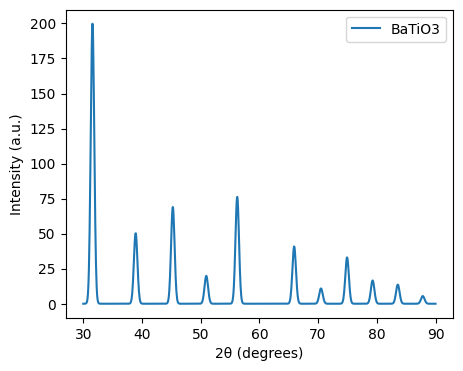

In [16]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
import matplotlib.pyplot as plt

# structure = Structure.from_file("BaTiO3.cif")
structure = Structure.from_id(id_='mp-2998', api_key="WrdzUerIW5RHiXiXNSPm3sHeM4JN8BGV")

xrd = XRDCalculator(wavelength='CuKa')
range_2theta = (30, 90)
sigma = 0.3

# Apply smearing to the XRD pattern
pattern = xrd.get_pattern(structure=structure, scaled=True, two_theta_range=range_2theta)

# Apply Gaussian smearing
x_new = np.linspace(range_2theta[0], range_2theta[1], 1000)
y_new = np.zeros_like(x_new)

for x, y in zip(pattern.x, pattern.y):
    y_new += y * np.exp(-(x_new - x)**2 / (2 * sigma**2))


# Plot the smeared XRD pattern
plt.figure(figsize=(5, 4))
plt.plot(x_new, y_new, label=f'{structure.composition.reduced_formula}')
plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()

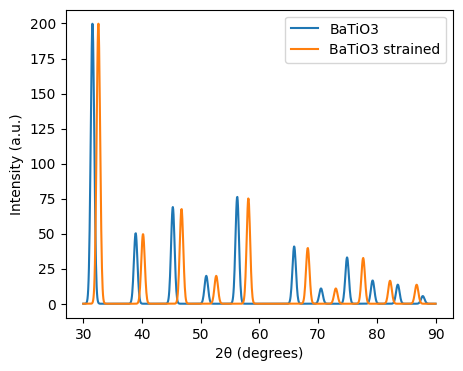

In [17]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
import matplotlib.pyplot as plt

structure_strained = structure.copy().apply_strain(-0.03) # 3% compressive strain
xrd = XRDCalculator(wavelength='CuKa')
range_2theta = (30, 90)
sigma = 0.3

# Apply smearing to the XRD pattern
pattern_strained = xrd.get_pattern(structure=structure_strained, scaled=True, two_theta_range=range_2theta)

# Apply Gaussian smearing
x_new = np.linspace(range_2theta[0], range_2theta[1], 1000)
y_new_strain = np.zeros_like(x_new)

for x, y in zip(pattern_strained.x, pattern_strained.y):
    y_new_strain += y * np.exp(-(x_new - x)**2 / (2 * sigma**2))

# Plot the smeared XRD pattern
plt.figure(figsize=(5, 4))
plt.plot(x_new, y_new, label=f'{structure.composition.reduced_formula}')
plt.plot(x_new, y_new_strain, label=f'{structure.composition.reduced_formula} strained')

plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()

In [19]:
from pymatgen.analysis.diffraction.tem import TEMCalculator 
from mpl_toolkits.axes_grid1 import make_axes_locatable

# structure = Structure.from_file("BaTiO3.cif")
structure = Structure.from_id(id_='mp-2998', api_key="WrdzUerIW5RHiXiXNSPm3sHeM4JN8BGV")
tem = TEMCalculator(voltage = 200, beam_direction=(0, 0, 1))

fig = tem.get_plot_2d(structure)

fig.show()



Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]